![APSSDC-LOGO](https://drive.google.com/uc?export=download&id=15AKQ6_-BixW4K6mL6RPphF5EKXqYF2zj)

<h1><center>Day05 Machine Learning Using Python</center></h1>

## Day05 Objectives Classification models - 1	

- Logistic regression
- Support Vector Machines

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### [Titanic Dataset](https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Classification/titanic.csv)

### [Mushroom Dataset](https://github.com/AP-State-Skill-Development-Corporation/Datasets/blob/master/Classification/mushrooms.csv)

$$ Y = 1/{1+e^{-z}}$$

$$ Y = e^z/{e^z + 1}$$

$$ log(P[1|0] / 1 + P[1|0]) = z$$

In [2]:
import pandas as pd

### [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Classification/titanic.csv')

df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 11)

In [5]:
df.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

In [6]:
df['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [7]:
df['age'].min()

0.42

In [8]:
df['age'].max()

80.0

In [9]:
df['parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

In [10]:
df['fare'].min(), df['fare'].max()

(0.0, 512.3292)

In [11]:
df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [12]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [13]:
df.groupby('sex').sum()

,survived,pclass,age,sibsp,parch,fare
sex,,,,,,
female,233,678,7286.00,218,204,13966.6628
male,109,1379,13919.17,248,136,14727.2865


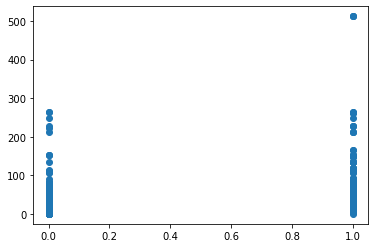

In [14]:
import matplotlib.pyplot as plt

plt.plot(df['survived'], df['fare'], 'o')

In [15]:
df.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

- mean - not outliers
- median - outliers
- mode/most frequent value
- constant value
- bfill
- ffill


- fillna()

In [16]:
df['age'].fillna(df['age'].mean(), inplace = True)
df['embarked'].fillna(df['embarked'].mode().values[0], inplace = True)

df.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age           0
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      0
dtype: int64

In [17]:
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
from sklearn.preprocessing import LabelEncoder


lbc = LabelEncoder()

In [19]:
y = df['survived']

x = df.drop(['survived', 'name', 'ticket','cabin'], axis = 'columns')

In [20]:
x.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [21]:
x['sex'] = lbc.fit_transform(x['sex'])
x['embarked'] = lbc.fit_transform(x['embarked'])

In [22]:
x.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [23]:
from sklearn.model_selection import train_test_split

xtr, xtt, ytr, ytt = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [24]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()

In [25]:
model.fit(xtr, ytr)

C:\Users\Jesus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
ytt.head(1)

709    1
Name: survived, dtype: int64

In [27]:
xtt.head(1)

,pclass,sex,age,sibsp,parch,fare,embarked
709,3,1,29.699118,1,1,15.2458,0


In [28]:
print(ytt)

709    1
439    0
840    0
720    1
39     1
      ..
880    1
425    0
101    0
199    0
424    0
Name: survived, Length: 223, dtype: int64


In [30]:
model.predict(xtt.head(1).values)

array([0], dtype=int64)

In [31]:
model.predict_proba(xtt.head(1).values)

array([[0.8848125, 0.1151875]])

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [33]:
pred = model.predict(xtt)

In [34]:
pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [35]:
confusion_matrix(ytt, pred), confusion_matrix(ytt, pred).sum()

(array([[115,  19],
        [ 24,  65]], dtype=int64),
 223)

In [36]:
accuracy_score(ytt, pred)

0.8071748878923767

### [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) --> Support Vector Machine

## Content
This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

## About this file:

- **`Attribute Information:`** (classes: edible=e, poisonous=p)
- **cap-shape:** bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- **cap-surface:** fibrous=f,grooves=g,scaly=y,smooth=s
- **cap-color:** brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- **bruises:** bruises=t,no=f
- **odor:** almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- **gill-attachment:** attached=a,descending=d,free=f,notched=n
- **gill-spacing:** close=c,crowded=w,distant=d
- **gill-size:** broad=b,narrow=n
- **gill-color:** black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
- **stalk-shape:** enlarging=e,tapering=t
- **stalk-root:** bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
- **stalk-surface-above-ring:** fibrous=f,scaly=y,silky=k,smooth=s
- **stalk-surface-below-ring:** fibrous=f,scaly=y,silky=k,smooth=s
- **stalk-color-above-ring:** brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- **stalk-color-below-ring:** brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- **veil-type:** partial=p,universal=u
- **veil-color:** brown=n,orange=o,white=w,yellow=y
- **ring-number:** none=n,one=o,two=t
- **ring-type:** cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
- **spore-print-color:** black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
- **population:** abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
- **habitat:** grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d- 

In [37]:
df1 = pd.read_csv('https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Classification/mushrooms.csv')

In [38]:
df1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [39]:
df1.head(1).values

array([['p', 'x', 's', 'n', 't', 'p', 'f', 'c', 'n', 'k', 'e', 'e', 's',
        's', 'w', 'w', 'p', 'w', 'o', 'p', 'k', 's', 'u']], dtype=object)

In [40]:
df1.shape

(8124, 23)

In [41]:
from sklearn.preprocessing import LabelEncoder
lbc = LabelEncoder()

In [42]:
for col in df1.columns:
    df1[col] = lbc.fit_transform(df1[col])

df1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [43]:
x = df1.drop('class', axis = 'columns')

In [44]:
y = df1['class']

In [45]:
xtr, xtt, ytr, ytt = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [46]:
from sklearn.svm import SVC

In [47]:

help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.svm.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  

In [48]:
svc = SVC(kernel = 'linear')

In [49]:
svc.fit(xtr, ytr)

SVC(kernel='linear')

In [50]:
pred = svc.predict(xtt)

In [51]:
confusion_matrix(ytt, pred)

array([[1207,   50],
       [  45, 1136]], dtype=int64)

In [52]:
accuracy_score(ytt, pred)

0.961033634126333

In [53]:
ytt.shape

(2438,)

In [55]:
from sklearn.model_selection import GridSearchCV

parameters = [{'C':[1,10,100,1000],'kernel':['linear']},
             {'C':[1,10,100,1000],'kernel':['rbf'],
             'gamma':[0.1,0.2,0.4,0.6,0.8]}]

grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search.fit(xtt,ytt)
best_accuracy=grid_search.best_score_
best_parameters = grid_search.best_params_